In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


## Load the dataset

In [10]:
df =pd.read_csv(r'C:\Users\270356\Downloads\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [15]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Cleaning the dataset 

In [68]:
# Fill NaN values with the mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)


In [70]:
numeric_df = df.select_dtypes(include=['number'])

In [72]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [74]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,Payment_Cash,Payment_Credit card,Payment_Ewallet,Sales_per_Branch,Avg_Gross_Income,Customer_Segment,gross margin %
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,NaN,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,False,False,True,106200.3705,15.411572,1_Member,4.761905
2019-03-08,226-31-3081,C,Naypyitaw,Normal,NaN,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,True,False,False,110568.7065,15.220597,1_Normal,4.761905
2019-03-03,631-41-3108,A,Yangon,Normal,NaN,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,False,True,False,106200.3705,16.030331,0_Normal,4.761905
2019-01-27,123-19-1176,A,Yangon,Member,NaN,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,False,False,True,106200.3705,15.411572,0_Member,4.761905
2019-02-08,373-73-7910,A,Yangon,Normal,NaN,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,False,False,True,106200.3705,15.812630,0_Normal,4.761905


## Feature Engineering 

In [30]:
# Sales per Branch 
df['Sales_per_Branch'] = df.groupby('Branch')['Total'].transform('sum')

In [32]:
# Average Gross Income by Product Line 
df['Avg_Gross_Income'] = df.groupby('Product line')['gross income'].transform('mean')

In [34]:
# Customer Segmentation
df['Customer_Segment'] = df['Gender'].astype(str) + '_' + df['Customer type']


In [36]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Payment_Cash,Payment_Credit card,Payment_Ewallet,Sales_per_Branch,Avg_Gross_Income,Customer_Segment
0,750-67-8428,A,Yangon,Member,1,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,False,False,True,106200.3705,15.411572,1_Member
1,226-31-3081,C,Naypyitaw,Normal,1,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,True,False,False,110568.7065,15.220597,1_Normal
2,631-41-3108,A,Yangon,Normal,0,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,False,True,False,106200.3705,16.030331,0_Normal
3,123-19-1176,A,Yangon,Member,0,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,False,False,True,106200.3705,15.411572,0_Member
4,373-73-7910,A,Yangon,Normal,0,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,False,False,True,106200.3705,15.812630,0_Normal


## Exploratory Data Analysis (EDA)


In [38]:
# Customer Segmentation # Analyzing customer types and their buying behavior 
customer_segmentation = df.groupby('Customer type')['Total'].agg(['mean', 'count']) 
print(customer_segmentation)

                     mean  count
Customer type                   
Member         327.791305    501
Normal         318.122856    499


C:\Users\270356\AppData\Local\Temp\ipykernel_31528\1097989445.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = df['Total'].resample('M').sum()


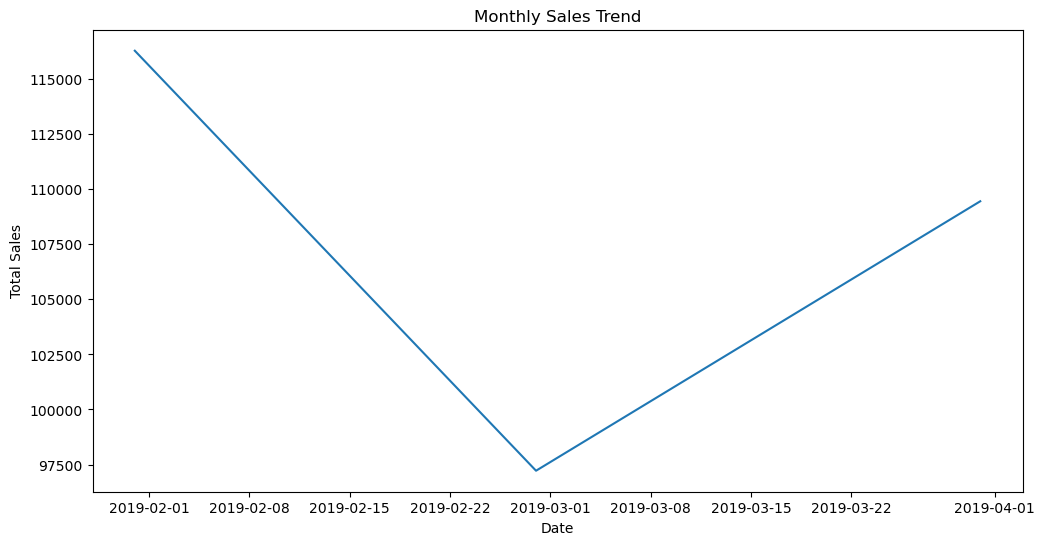

In [40]:
# Sales Trend Analysis 
# Plotting sales data over time

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
sales_trend = df['Total'].resample('M').sum()
plt.figure(figsize=(12, 6)) 
plt.plot(sales_trend)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales') 
plt.show()

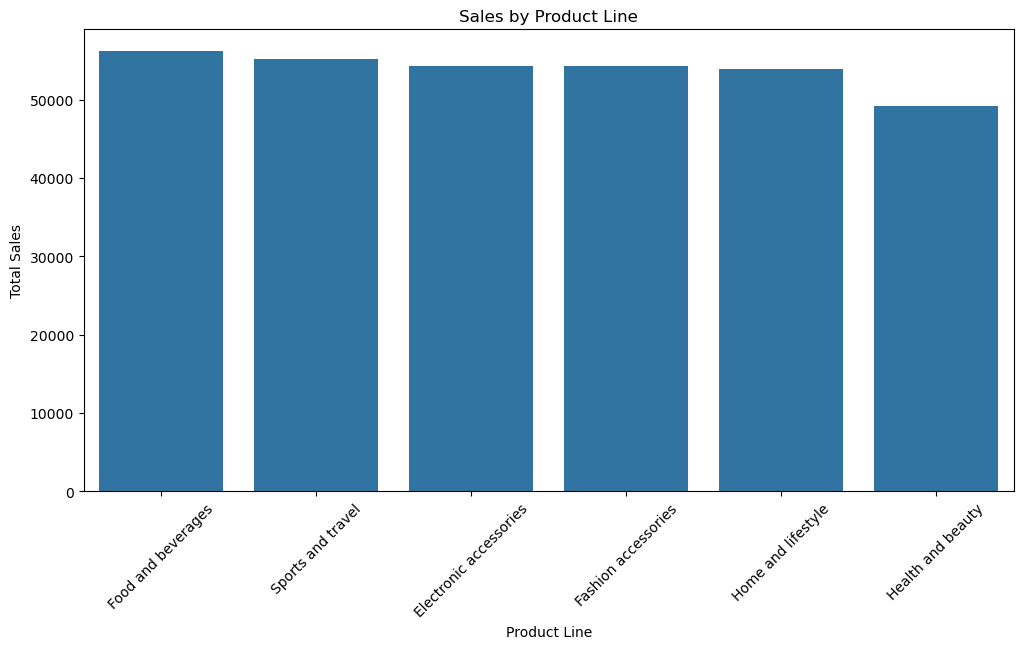

In [42]:
# Product Line Analysis
# Identifying the most and least popular product categories

product_line_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False) 
plt.figure(figsize=(12, 6)) 
sns.barplot(x=product_line_sales.index, y=product_line_sales.values)
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [44]:
# Branch Performance
branch_performance = df.groupby('Branch')['Total'].agg(['sum', 'mean', 'count'])
(branch_performance)

,sum,mean,count
Branch,,,
A,106200.3705,312.354031,340
B,106197.6720,319.872506,332
C,110568.7065,337.099715,328


In [50]:
# Sales Performance by Customer Type 
customer_type_performance = df.groupby('Customer type')[['Total', 'gross income']].agg(['sum', 'mean']) 
print(customer_type_performance)


                    Total             gross income           
                      sum        mean          sum       mean
Customer type                                                
Member         164223.444  327.791305     7820.164  15.609110
Normal         158743.305  318.122856     7559.205  15.148707


In [52]:
# Group by Product Line and calculate total sales and gross income
product_line_performance = df.groupby('Product line')[['Total', 'gross income']].agg(['sum', 'mean'])
print(product_line_performance)


                             Total             gross income           
                               sum        mean          sum       mean
Product line                                                          
Electronic accessories  54337.5315  319.632538    2587.5015  15.220597
Fashion accessories     54305.8950  305.089298    2585.9950  14.528062
Food and beverages      56144.8440  322.671517    2673.5640  15.365310
Health and beauty       49193.7390  323.643020    2342.5590  15.411572
Home and lifestyle      53861.9130  336.636956    2564.8530  16.030331
Sports and travel       55122.8265  332.065220    2624.8965  15.812630


In [54]:
# Calculate gross income and gross margin percentage
df['gross margin %'] = (df['gross income'] / df['Total']) * 100
gross_income_and_margins = df[['gross income', 'gross margin %']].agg(['sum', 'mean'])
print(gross_income_and_margins)


      gross income  gross margin %
sum   15379.369000     4761.904762
mean     15.379369        4.761905


## Customer Sattisfication Analysis 

In [76]:
# Group by Branch, Product Line, and Payment Method to calculate average customer satisfaction ratings
customer_satisfaction = df.groupby(['Branch', 'Product line', 'Payment_Cash','Payment_Credit card','Payment_Ewallet'])['Rating'].mean().reset_index()
print(customer_satisfaction)


   Branch            Product line  Payment_Cash  Payment_Credit card  \
0       A  Electronic accessories         False                False   
1       A  Electronic accessories         False                 True   
2       A  Electronic accessories          True                False   
3       A     Fashion accessories         False                False   
4       A     Fashion accessories         False                 True   
5       A     Fashion accessories          True                False   
6       A      Food and beverages         False                False   
7       A      Food and beverages         False                 True   
8       A      Food and beverages          True                False   
9       A       Health and beauty         False                False   
10      A       Health and beauty         False                 True   
11      A       Health and beauty          True                False   
12      A      Home and lifestyle         False                F

In [80]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation between customer ratings and other numerical features
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Rating'].sort_values(ascending=False))


Rating                     1.000000
Sales_per_Branch           0.040767
gross margin %             0.021780
Unit price                -0.008778
Quantity                  -0.015815
Avg_Gross_Income          -0.030916
cogs                      -0.036442
Tax 5%                    -0.036442
gross income              -0.036442
Total                     -0.036442
Gender                          NaN
gross margin percentage         NaN
Name: Rating, dtype: float64
